In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import io
import base64
from matplotlib import rc,animation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
train=pd.read_csv("application_train.csv")

# Data Visualization

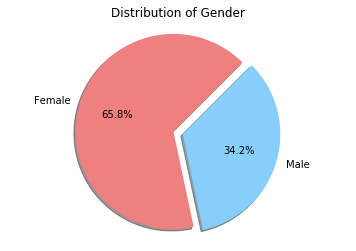

In [4]:
#plot pie chart of gender distribution
labels = 'Female', 'Male'
sizes = [202448, 105059]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=45)
 
plt.axis('equal')
plt.title("Distribution of Gender")
plt.show()

Text(0.5, 1.0, 'Distribution of Repayment Status')

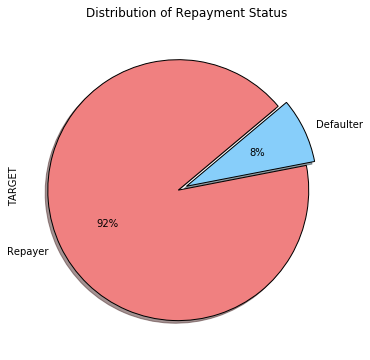

In [357]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
train["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ['lightcoral', 'lightskyblue'],
                                        labels=["Repayer","Defaulter"],startangle = 40,
                                        wedgeprops={"linewidth":1,"edgecolor":"k"},explode=[.07,0],shadow =True)
plt.title("Distribution of Repayment Status")

## Violin plot

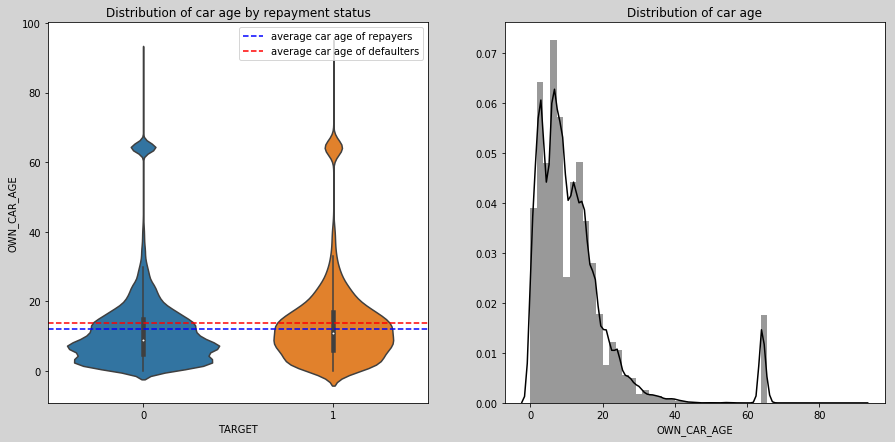

In [342]:
# check distribution for own car age between repayer and defaulter
fig = plt.figure(figsize=(15,7))
plt.subplot(121)
sns.violinplot(y = train[train["OWN_CAR_AGE"].notnull()]["OWN_CAR_AGE"],
               x=train[train["OWN_CAR_AGE"].notnull()]["TARGET"])
plt.axhline(train[(train["OWN_CAR_AGE"].notnull())&(train["TARGET"] ==0)]["OWN_CAR_AGE"].mean(),color="b",
            linestyle="dashed",label = "average car age of repayers")
plt.axhline(train[(train["OWN_CAR_AGE"].notnull())&(train["TARGET"] ==1)]["OWN_CAR_AGE"].mean(),color="r",
            linestyle="dashed",label = "average car age of defaulters")
plt.legend(loc="best")
plt.title("Distribution of car age by repayment status")

plt.subplot(122)
sns.distplot(train[train["OWN_CAR_AGE"].notnull()]["OWN_CAR_AGE"],color="k")
plt.title("Distribution of car age")

fig.set_facecolor("lightgrey")

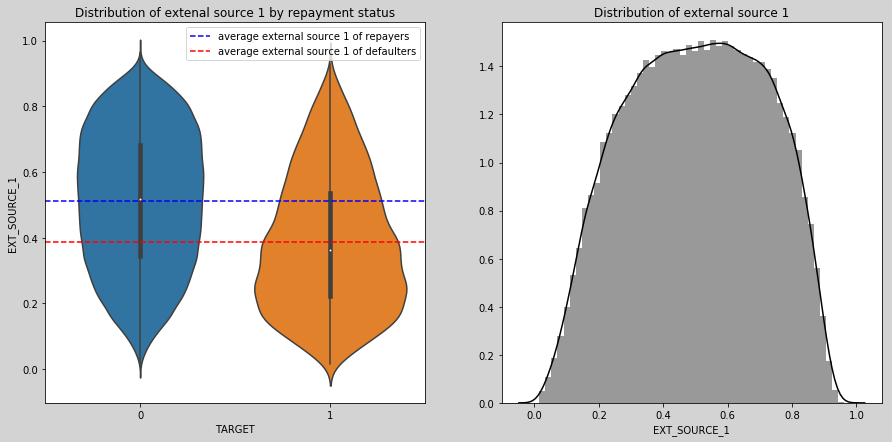

In [343]:
fig = plt.figure(figsize=(15,7))
plt.subplot(121)
sns.violinplot(y = train[train["EXT_SOURCE_1"].notnull()]["EXT_SOURCE_1"],
               x=train[train["EXT_SOURCE_1"].notnull()]["TARGET"])
plt.axhline(train[(train["EXT_SOURCE_1"].notnull())&(train["TARGET"] ==0)]["EXT_SOURCE_1"].mean(),color="b",
            linestyle="dashed",label = "average external source 1 of repayers")
plt.axhline(train[(train["EXT_SOURCE_1"].notnull())&(train["TARGET"] ==1)]["EXT_SOURCE_1"].mean(),color="r",
            linestyle="dashed",label = "average external source 1 of defaulters")
plt.legend(loc="best")
plt.title("Distribution of extenal source 1 by repayment status")

plt.subplot(122)
sns.distplot(train[train["EXT_SOURCE_1"].notnull()]["EXT_SOURCE_1"],color="k")
plt.title("Distribution of external source 1")

fig.set_facecolor("lightgrey")

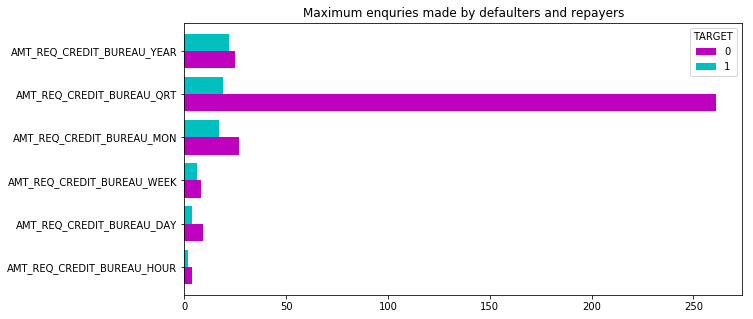

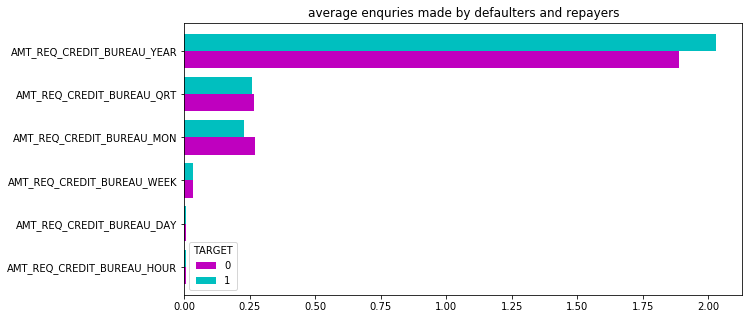

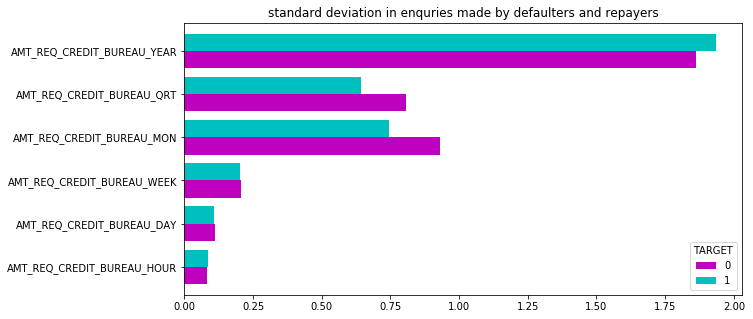

In [354]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
colors = ['m','c']
train.groupby("TARGET")[cols].max().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8,color=colors)
plt.title("Maximum enquries made by defaulters and repayers")
train.groupby("TARGET")[cols].mean().transpose().plot(kind="barh",
                                                                  figsize=(10,5),width=.8,color=colors)
plt.title("average enquries made by defaulters and repayers")
train.groupby("TARGET")[cols].std().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8,color=colors)
plt.title("standard deviation in enquries made by defaulters and repayers")
plt.show()

# Data Preprocessing

## Dropping Columns

In [4]:
drop_1_50=['OWN_CAR_AGE','COMMONAREA_AVG','YEARS_BUILD_AVG','BASEMENTAREA_AVG','ELEVATORS_AVG','APARTMENTS_AVG',
          'YEARS_BEGINEXPLUATATION_AVG']

In [5]:
drop_50_75=train.ix[:,50:75].columns.tolist()

In [6]:
drop_75_100=['YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [7]:
drop_columns=drop_1_50+ drop_50_75+drop_75_100

In [8]:
df=train.drop(drop_columns, axis=1)

In [365]:
# df.columns.tolist()

## Missing Value Treatment

### Filling with Mode of the Column

In [10]:
cols_mode = ['OCCUPATION_TYPE','NAME_TYPE_SUITE','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5']

df_mode=df[cols_mode].apply(lambda x: x.fillna(x.mode()[0]))

### Filling with Median of the Column

In [11]:
#fill quantitative nans with median
cols_median=['CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3','AMT_ANNUITY','AMT_GOODS_PRICE']

df_median=df[cols_median].apply(lambda x: x.fillna(x.median()))


In [339]:
# df_median

In [13]:
df_columns=list(set(df.columns.tolist())-set(df_median.columns.tolist())-set(df_mode.columns.tolist()))

In [340]:
# df_columns

In [15]:
df[df_columns].head()

,FLAG_MOBIL,WEEKDAY_APPR_PROCESS_START,NAME_EDUCATION_TYPE,FLAG_EMAIL,REGION_POPULATION_RELATIVE,NAME_CONTRACT_TYPE,AMT_CREDIT,HOUR_APPR_PROCESS_START,DAYS_EMPLOYED,TARGET,...,FLAG_PHONE,FLAG_OWN_REALTY,REG_CITY_NOT_LIVE_CITY,FLAG_CONT_MOBILE,AMT_INCOME_TOTAL,REGION_RATING_CLIENT_W_CITY,CODE_GENDER,FLAG_WORK_PHONE,ORGANIZATION_TYPE,NAME_HOUSING_TYPE
0,1,WEDNESDAY,Secondary / secondary special,0,0.018801,Cash loans,406597.5,10,-637,1,...,1,Y,0,1,202500.0,2,M,0,Business Entity Type 3,House / apartment
1,1,MONDAY,Higher education,0,0.003541,Cash loans,1293502.5,11,-1188,0,...,1,N,0,1,270000.0,1,F,0,School,House / apartment
2,1,MONDAY,Secondary / secondary special,0,0.010032,Revolving loans,135000.0,9,-225,0,...,1,Y,0,1,67500.0,2,M,1,Government,House / apartment
3,1,WEDNESDAY,Secondary / secondary special,0,0.008019,Cash loans,312682.5,17,-3039,0,...,0,Y,0,1,135000.0,2,F,0,Business Entity Type 3,House / apartment
4,1,THURSDAY,Secondary / secondary special,0,0.028663,Cash loans,513000.0,11,-3038,0,...,0,Y,0,1,121500.0,2,M,0,Religion,House / apartment


In [338]:
# df_median

In [17]:
df=pd.concat([df[df_columns], df_median, df_mode], axis=1)

In [61]:
df['EXT_SOURCE_1']

In [19]:
#encode categorical variables to dummy 
df.NAME_CONTRACT_TYPE=df.NAME_CONTRACT_TYPE.replace('Cash loans',0)
df.NAME_CONTRACT_TYPE=df.NAME_CONTRACT_TYPE.replace('Revolving loans',1)
df.CODE_GENDER=df.CODE_GENDER.replace('F',0)
df.CODE_GENDER=df.CODE_GENDER.replace('M',1)
df.CODE_GENDER=df.CODE_GENDER.replace('XNA',2)
df.FLAG_OWN_CAR=df.FLAG_OWN_CAR.replace('N',0)
df.FLAG_OWN_CAR=df.FLAG_OWN_CAR.replace('Y',1)
df.FLAG_OWN_REALTY=df.FLAG_OWN_REALTY.replace('N',0)
df.FLAG_OWN_REALTY=df.FLAG_OWN_REALTY.replace('Y',1)

In [20]:
df=pd.get_dummies(df,columns=['NAME_TYPE_SUITE'],prefix=['TYPE_SUITE'])
df=pd.get_dummies(df,columns=['NAME_INCOME_TYPE'],prefix=['INCOME_TYPE'])
df=pd.get_dummies(df,columns=['NAME_EDUCATION_TYPE'],prefix=['EDUCATION_TYPE'])
df=pd.get_dummies(df,columns=['NAME_FAMILY_STATUS'],prefix=['FAMILY_STATUS'])
df=pd.get_dummies(df,columns=['NAME_HOUSING_TYPE'],prefix=['HOUSING_TYPE'])
df=pd.get_dummies(df,columns=['OCCUPATION_TYPE'],prefix=['OCCUPATION'])
df=pd.get_dummies(df,columns=['WEEKDAY_APPR_PROCESS_START'],prefix=['WEEKDAY'])
df=pd.get_dummies(df,columns=['ORGANIZATION_TYPE'],prefix=['ORGANIZATION'])

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc

#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    gender=pd.concat([x_ts.reset_index(drop=True), pd.DataFrame(predictions, columns=['predictions']), y_ts.reset_index(drop=True)], axis=1)
    gender_1=gender[gender['CODE_GENDER']==1]
    gender_0=gender[gender['CODE_GENDER']==0]
    print ("Prediction_gender_1 : ", len(gender_1[(gender_1['predictions']==1) & (gender_1['TARGET']==1)])/len(gender_1[gender_1['TARGET']==1]))
    print ("Prediction_gender_0 : ", len(gender_0[(gender_0['predictions']==1) & (gender_0['TARGET']==1)])/len(gender_0[gender_0['TARGET']==1]))
#     print ("Accuracy score_gender_1 : ", accuracy_score(gender_1['predictions'],gender_1['TARGET']))
#     print ("Accuracy score_gender_0 : ", accuracy_score(gender_0['predictions'],gender_0['TARGET']))
    
    
#     print ("Accuracy score_gender_1 : ", accuracy_score(gender_1['predictions'],gender_1['TARGET']))
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    ax.set_facecolor("k")

In [73]:
from sklearn.utils import resample
df_majority = df[df["TARGET"] == 0]
df_minority = df[df["TARGET"] == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=24825,
                                   random_state=123)

## Test train split

In [74]:
df_resize = pd.concat([df_minority,df_majority_downsampled],axis=0)
df_resize=df_resize.reset_index(drop=True)

In [75]:
x_tr,x_ts,y_tr,y_ts = train_test_split(
    p('TARGET', axis=1),df_resize['TARGET'],test_size=0.25,random_state=1)

# Logistic Regression

### Default parameters with Ridge penalty

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Prediction_gender_1 :  0.6015625
Prediction_gender_0 :  0.5113792157938031
Accuracy score :  0.5814065898654637
Recall score   :  0.5977682403433476
classification report :
               precision    recall  f1-score   support

           0       0.61      0.57      0.59      6588
           1       0.55      0.60      0.57      5825

   micro avg       0.58      0.58      0.58     12413
   macro avg       0.58      0.58      0.58     12413
weighted avg       0.58      0.58      0.58     12413



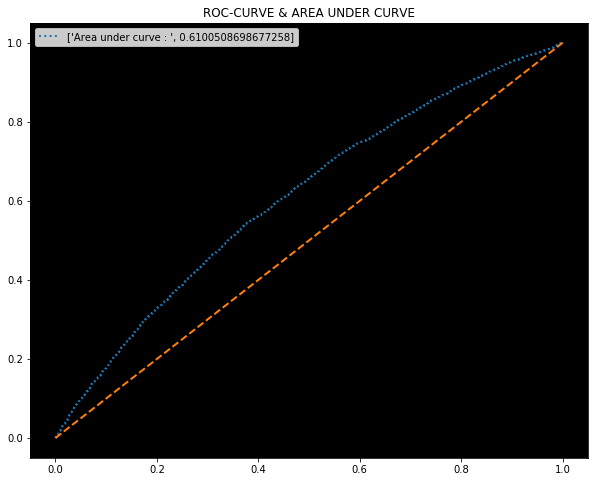

In [76]:
logit = LogisticRegression(penalty='l2')
model(logit, x_tr, y_tr, x_ts, y_ts,x_tr.columns)

## Random Search and GridSearch in Logistic Regression

In [252]:
#Random Search

from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(x_tr, y_tr)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.584634 using {'max_iter': 140, 'dual': False, 'C': 1.0}
Execution time: 14.4896821975708 ms


In [253]:
random_lr = random_result.best_estimator_
random_accuracy_lr = evaluate(random_lr, x_ts, y_ts)

41.85934101345364
Model Performance
Average Error: 0.4186 degrees.
Accuracy = 58.14%.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=140, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Prediction_gender_1 :  0.47842261904761907
Prediction_gender_0 :  0.46695914450233067
Accuracy score :  0.5847141284206568
Recall score   :  0.5862501425151067
classification report :
               precision    recall  f1-score   support

           0       0.61      0.58      0.60     19695
           1       0.56      0.59      0.57     17542

   micro avg       0.58      0.58      0.58     37237
   macro avg       0.58      0.58      0.58     37237
weighted avg       0.59      0.58      0.59     37237



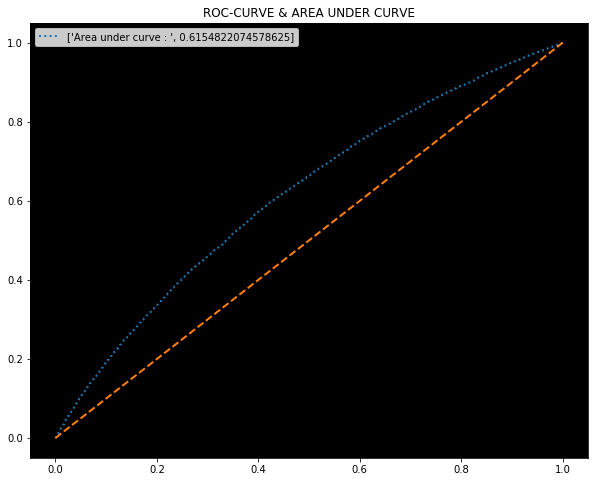

In [254]:
model(random_lr,x_tr, y_tr, x_tr, y_tr,x_tr.columns)

In [250]:
#Selecting a grid
from sklearn.model_selection import GridSearchCV

dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

import time

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x_tr, y_tr)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.584634 using {'dual': False, 'max_iter': 100}
Execution time: 24.209253311157227 ms


In [251]:
#choosing a larger Grid
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x_tr, y_tr)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.584714 using {'C': 2.0, 'dual': False, 'max_iter': 100}
Execution time: 53.37791991233826 ms


In [257]:
best_grid_lr = grid.best_estimator_
grid_accuracy_lr = evaluate(best_grid_lr, x_ts, y_ts)

41.835172802706836
Model Performance
Average Error: 0.4184 degrees.
Accuracy = 58.16%.


LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Prediction_gender_1 :  0.47767857142857145
Prediction_gender_0 :  0.46695914450233067
Accuracy score :  0.5847141284206568
Recall score   :  0.5862796532846716
classification report :
               precision    recall  f1-score   support

           0       0.61      0.58      0.60     19701
           1       0.56      0.59      0.57     17536

   micro avg       0.58      0.58      0.58     37237
   macro avg       0.58      0.58      0.58     37237
weighted avg       0.59      0.58      0.59     37237



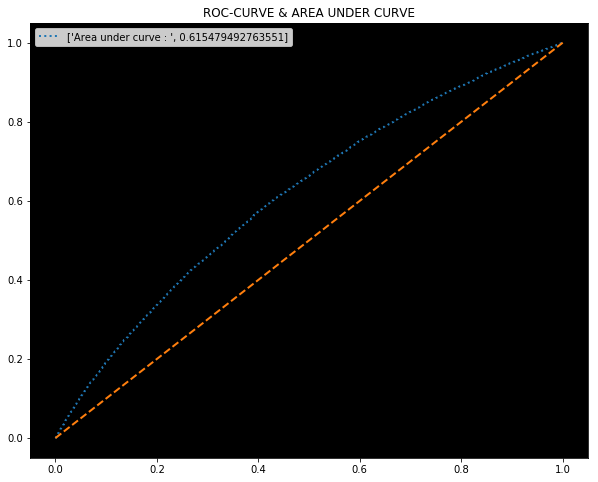

In [258]:
model(best_grid_lr,x_tr, y_tr, x_tr, y_tr,x_tr.columns)

# Gaussian Naive Bayes

GaussianNB(priors=None, var_smoothing=1e-09)
Prediction_gender_1 :  0.7801339285714286
Prediction_gender_0 :  0.7214148615300247
Accuracy score :  0.5677918311447676
Recall score   :  0.5571529578128682
classification report :
               precision    recall  f1-score   support

           0       0.38      0.59      0.46      3927
           1       0.75      0.56      0.64      8486

   micro avg       0.57      0.57      0.57     12413
   macro avg       0.56      0.57      0.55     12413
weighted avg       0.63      0.57      0.58     12413



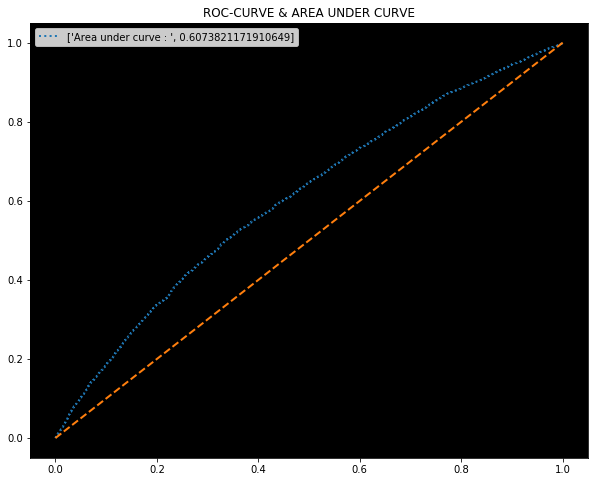

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model(gnb,x_tr, y_tr, x_ts, y_ts,x_tr.columns)

# XGBoost Classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Prediction_gender_1 :  0.7496279761904762
Prediction_gender_0 :  0.6210584041678091
Accuracy score :  0.686377185209055
Recall score   :  0.6995750245178163
classification report :
               precision    recall  f1-score   support

           0       0.70      0.67      0.69      6295
           1       0.68      0.70      0.69      6118

   micro avg       0.69      0.69      0.69     12413
   macro avg       0.69      0.69      0.69     12413
weighted avg       0.69      0.69      0.69     12413



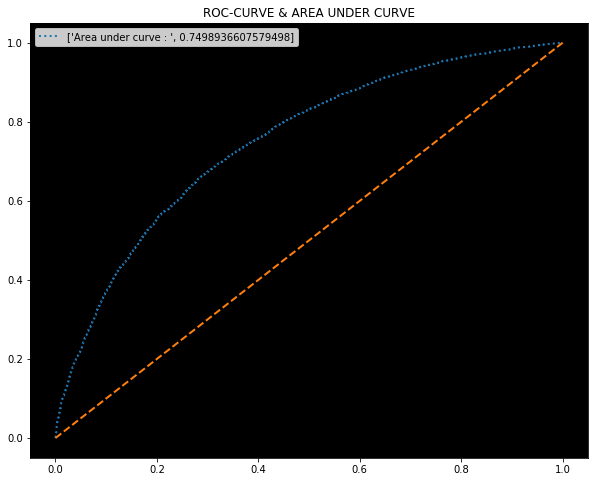

In [260]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model(xgb,x_tr, y_tr, x_ts, y_ts,x_tr.columns)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model(rfc,x_tr, y_tr, x_ts, y_ts,x_tr.columns)

In [ ]:
%%time
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

## Creating Random Grid

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [39]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [40]:
%%time
rf_random.fit(x_tr, y_tr)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 31.7min finished


Wall time: 33min 15s


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [51]:
def evaluate(model, x_ts, y_ts):
    predictions = model.predict(x_ts)
    errors = abs(predictions - y_ts)
    mape = 100 * np.mean(errors)
    accuracy = 100 - mape
    print (mape)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_tr,y_tr)
base_accuracy = evaluate(base_model, x_ts, y_ts)

36.63900749214533
Model Performance
Average Error: 0.3664 degrees.
Accuracy = 63.36%.


In [209]:
x_tr.columns

Index(['FLAG_MOBIL', 'FLAG_EMAIL', 'REGION_POPULATION_RELATIVE',
       'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START',
       'DAYS_EMPLOYED', 'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_WORK_CITY',
       'CNT_CHILDREN',
       ...
       'ORGANIZATION_Trade: type 4', 'ORGANIZATION_Trade: type 5',
       'ORGANIZATION_Trade: type 6', 'ORGANIZATION_Trade: type 7',
       'ORGANIZATION_Transport: type 1', 'ORGANIZATION_Transport: type 2',
       'ORGANIZATION_Transport: type 3', 'ORGANIZATION_Transport: type 4',
       'ORGANIZATION_University', 'ORGANIZATION_XNA'],
      dtype='object', length=180)

In [52]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_ts, y_ts)

31.49117860307742
Model Performance
Average Error: 0.3149 degrees.
Accuracy = 68.51%.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Prediction_gender_1 :  0.7403273809523809
Prediction_gender_0 :  0.6207842061968741
Accuracy score :  0.6845242890518005
Recall score   :  0.6986368861882083
classification report :
               precision    recall  f1-score   support

           0       0.70      0.67      0.68      6324
           1       0.67      0.70      0.68      6089

   micro avg       0.68      0.68      0.68     12413
   macro avg       0.68      0.68      0.68     12413
weighted avg       0.69      0.68      0.68     12413



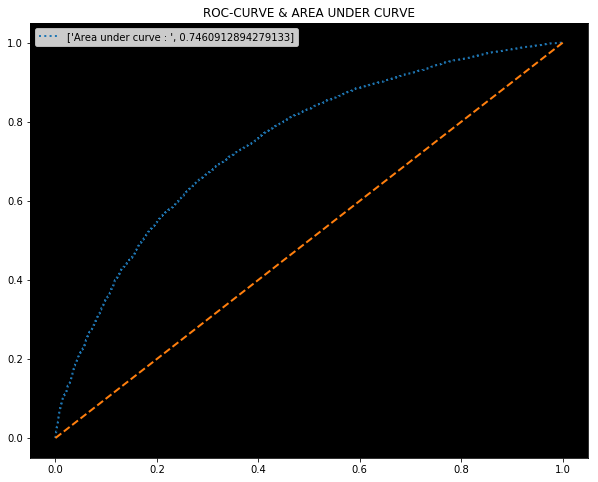

In [79]:
model(best_random,x_tr, y_tr, x_tr, y_tr,x_tr.columns)

In [53]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 8.12%.


## GridSearch for the range of best parameters

In [54]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 30, 40],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [900,1000,1100]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [58]:
grid_search.fit(x_tr,y_tr)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 67.1min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 72.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2], 'min_samples_split': [8, 10, 12], 'n_estimators': [900, 1000, 1100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [60]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_ts, y_ts)

31.60396358656247
Model Performance
Average Error: 0.3160 degrees.
Accuracy = 68.40%.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Prediction_gender_1 :  0.7384672619047619
Prediction_gender_0 :  0.6218809980806143
Accuracy score :  0.6821074679771207
Recall score   :  0.6952754618276933
classification report :
               precision    recall  f1-score   support

           0       0.69      0.67      0.68      6296
           1       0.67      0.70      0.68      6117

   micro avg       0.68      0.68      0.68     12413
   macro avg       0.68      0.68      0.68     12413
weighted avg       0.68      0.68      0.68     12413



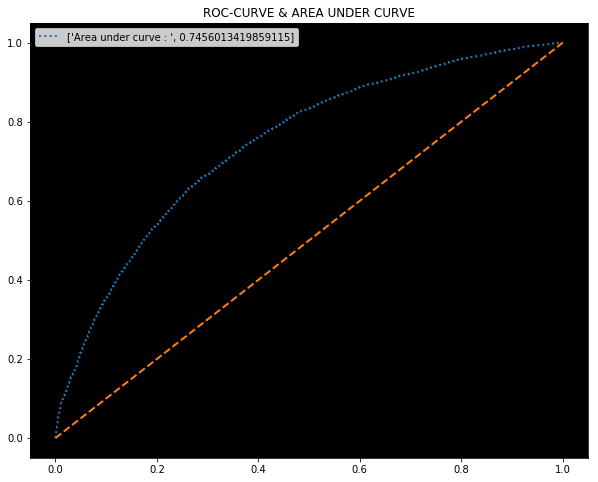

In [359]:
model(best_grid,x_tr, y_tr, x_ts, y_ts,x_tr.columns)

In [249]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 7.95%.


# Achieving Demographic Parity

In [262]:
x_tr_pred=pd.concat([x_tr.reset_index(drop=True),
                     pd.DataFrame(rf_random.predict_proba(x_tr)[:,0], columns=['pred'])], axis=1)

pred=best_random.predict(x_tr)
pred

tr_tot=pd.concat([x_tr_pred, y_tr.reset_index(drop=True), pd.DataFrame(pred, columns=['Rf_pred'])], axis=1)
# for i in range (1000):
#     if x_tr_pred['pred']>i/1000:
#         category=
tr_tot.head()

,FLAG_MOBIL,FLAG_EMAIL,REGION_POPULATION_RELATIVE,NAME_CONTRACT_TYPE,AMT_CREDIT,HOUR_APPR_PROCESS_START,DAYS_EMPLOYED,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_WORK_CITY,CNT_CHILDREN,...,ORGANIZATION_Trade: type 7,ORGANIZATION_Transport: type 1,ORGANIZATION_Transport: type 2,ORGANIZATION_Transport: type 3,ORGANIZATION_Transport: type 4,ORGANIZATION_University,ORGANIZATION_XNA,pred,TARGET,Rf_pred
0,1,0,0.028663,0,832500.0,12,-992,0,1,0,...,0,0,0,0,0,0,0,0.720156,0,0
1,1,0,0.031329,0,543037.5,8,-5255,0,0,1,...,0,0,0,0,0,0,0,0.190874,1,1
2,1,0,0.008230,0,539100.0,16,-1522,0,0,0,...,0,0,0,0,0,0,0,0.155052,1,1
3,1,0,0.008019,0,1724688.0,10,-3704,0,0,1,...,0,0,0,0,0,0,0,0.800784,0,0
4,1,0,0.026392,0,225000.0,11,-187,0,0,0,...,0,0,0,0,0,0,0,0.684597,0,0


In [263]:
accuracy_score(tr_tot['TARGET'], tr_tot['Rf_pred'])

0.98359158901093

In [264]:
g1=len(tr_tot[(tr_tot['Rf_pred']==1) & (tr_tot['CODE_GENDER']==1)])/len(tr_tot[tr_tot['CODE_GENDER']==1])
g0=len(tr_tot[(tr_tot['Rf_pred']==1) & (tr_tot['CODE_GENDER']==0)])/len(tr_tot[tr_tot['CODE_GENDER']==0])

print(g1, g0)

0.5735273343692612 0.4525759348325317


In [265]:
tr_tot['cost_rf']= np.where(tr_tot['TARGET']==1,
                             (np.where(abs(tr_tot['Rf_pred']-tr_tot['TARGET'])==1, tr_tot['AMT_CREDIT'],0)), 0)

print(sum(tr_tot['cost_rf']))

tr_tot['category_rf']=np.where(tr_tot['pred']<0.50,1,0)
accuracy_score(tr_tot['TARGET'], tr_tot['category_rf'])

0.98359158901093

In [266]:
a=[]
b=[]
c=[]
d=[]
tr_tot['category']=np.where(tr_tot['CODE_GENDER']==0,np.where(tr_tot['pred']<0.5,1,0),0) 
for i in range (1,500):
   
    tr_tot['category']=np.where(tr_tot['CODE_GENDER']==1,np.where(tr_tot['pred']>((500-i)/1000),0,1),tr_tot['category'])
    tr_tot['cost']= np.where(tr_tot['TARGET']==1,
                             (np.where(abs(tr_tot['category']-tr_tot['TARGET'])==1, tr_tot['AMT_CREDIT'],0)), 0)
    tr_tot['saved']= np.where(tr_tot['TARGET']==1,
                             (np.where(abs(tr_tot['category']-tr_tot['TARGET'])==0, tr_tot['AMT_CREDIT'],0)), 0)
    
    g1=len(tr_tot[(tr_tot['category']==1) & (tr_tot['CODE_GENDER']==1)])/len(tr_tot[tr_tot['CODE_GENDER']==1])
    g0=len(tr_tot[(tr_tot['category']==1) & (tr_tot['CODE_GENDER']==0)])/len(tr_tot[tr_tot['CODE_GENDER']==0])
#     print (g1-g0)
    if (g1-g0) <0:
        break
    c.append(g1-g0)
    a.append((500-i)/1000)
    b.append(sum(tr_tot['cost']))
    d.append(sum(tr_tot['saved']))

  
#     b=b.append(sum(tr_tot['cost']))

Text(0, 0.5, 'Cost')

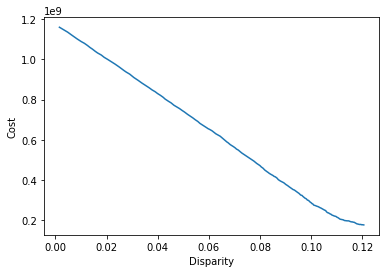

In [267]:
import matplotlib.pyplot as plt
plt.plot(c,b, )
plt.xlabel("Disparity")
plt.ylabel("Cost")

0.0015842572849990022

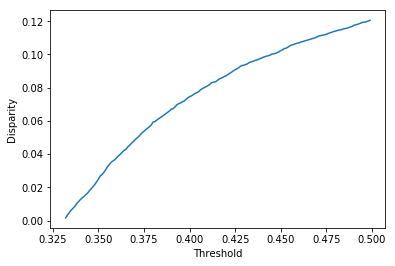

In [268]:
plt.plot(a,c)
plt.xlabel("Threshold")
plt.ylabel("Disparity")

min(c)

Text(0, 0.5, 'Cost')

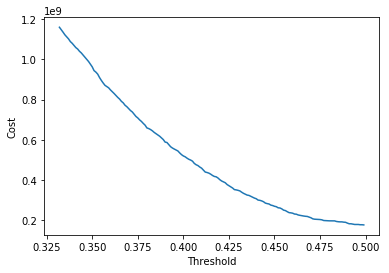

In [269]:
plt.plot(a,b)
plt.xlabel("Threshold")
plt.ylabel("Cost")

Text(0, 0.5, 'Money_Saved')

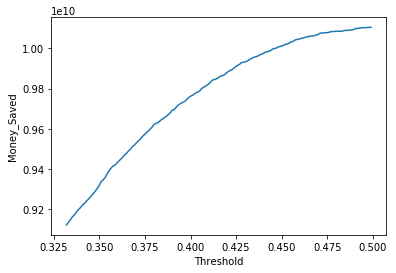

In [270]:
plt.plot(a,d)
plt.xlabel("Threshold")
plt.ylabel("Money_Saved")

##  Choosing a threshold of 0.4 for test data

In [271]:
# Predicting for the test data
pred=best_random.predict(x_ts)

In [274]:
#Appendig the results on the test data
x_ts_pred=pd.concat([x_ts.reset_index(drop=True),
                     pd.DataFrame(rf_random.predict_proba(x_ts)[:,0], columns=['pred'])], axis=1)
ts_tot=pd.concat([x_ts_pred, y_ts.reset_index(drop=True), pd.DataFrame(pred, columns=['Rf_pred'])], axis=1)

In [276]:
ts_tot.head()

,FLAG_MOBIL,FLAG_EMAIL,REGION_POPULATION_RELATIVE,NAME_CONTRACT_TYPE,AMT_CREDIT,HOUR_APPR_PROCESS_START,DAYS_EMPLOYED,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_WORK_CITY,CNT_CHILDREN,...,ORGANIZATION_Trade: type 7,ORGANIZATION_Transport: type 1,ORGANIZATION_Transport: type 2,ORGANIZATION_Transport: type 3,ORGANIZATION_Transport: type 4,ORGANIZATION_University,ORGANIZATION_XNA,pred,TARGET,Rf_pred
0,1,0,0.016612,0,71955.0,11,-1467,0,0,0,...,0,0,0,0,0,0,0,0.504738,0,0
1,1,0,0.025164,0,301464.0,12,-1208,0,1,0,...,0,0,0,0,0,0,0,0.505164,0,0
2,1,0,0.010147,0,439740.0,12,-1113,0,1,0,...,0,0,0,0,0,0,0,0.281594,1,1
3,1,0,0.016612,0,521280.0,16,-4751,0,0,0,...,0,0,0,0,0,0,0,0.417149,1,1
4,1,0,0.018801,1,675000.0,14,-1081,0,0,2,...,0,0,0,0,0,0,0,0.457884,0,1


In [279]:
# Calculating the cost for our best model
ts_tot['cost_rf']= np.where(tr_tot['TARGET']==1,
                             (np.where(abs(tr_tot['Rf_pred']-tr_tot['TARGET'])==1, tr_tot['AMT_CREDIT'],0)), 0)

print(sum(ts_tot['cost_rf']))

1365754369.5


In [364]:
len(ts_tot[(ts_tot['TARGET']==1) & (ts_tot['Rf_pred']==1)]) 

4254

In [305]:
g0_1=len(ts_tot[(ts_tot['Rf_pred']==1) & (ts_tot['CODE_GENDER']==1)])/len(ts_tot[ts_tot['CODE_GENDER']==1])
g0_0=len(ts_tot[(ts_tot['Rf_pred']==1) & (ts_tot['CODE_GENDER']==0)])/len(ts_tot[ts_tot['CODE_GENDER']==0])
print(abs(g0_1-g0_0))

0.18177738032876162


## Calculating cost for our best RF Model

In [294]:
ts_tot['saved']= np.where(ts_tot['TARGET']==1,
                             (np.where(abs(ts_tot['Rf_pred']-tr_tot['TARGET'])==0, ts_tot['AMT_CREDIT'],0)), 0)

In [335]:
pre_sav = sum(ts_tot['saved'])
pre_sav

2200062937.5

## Changing the threshold to 0.4 for Gender=1

In [284]:
tr_tot['category']=np.where(tr_tot['CODE_GENDER']==0,np.where(tr_tot['pred']<0.5,1,0),0)
ts_tot['category']=np.where(ts_tot['CODE_GENDER']==1,np.where(ts_tot['pred']>(0.4),0,1),tr_tot['category'])

## Calculating Parity

In [307]:
g1=len(ts_tot[(ts_tot['category']==1) & (ts_tot['CODE_GENDER']==1)])/len(ts_tot[ts_tot['CODE_GENDER']==1])
g0=len(ts_tot[(ts_tot['category']==1) & (ts_tot['CODE_GENDER']==0)])/len(ts_tot[ts_tot['CODE_GENDER']==0])
print(abs(g1-g0))

0.03469320790653252


## Calculating the saved cost

In [296]:
ts_tot['saved_par']= np.where(ts_tot['TARGET']==1,
                             (np.where(abs(ts_tot['category']-tr_tot['TARGET'])==0, ts_tot['AMT_CREDIT'],0)), 0)

In [332]:
post_sav = sum(ts_tot['saved_par'])
post_sav

1862560579.5

## Difference in Cost Saved

In [304]:
# %_Saving Reduced
(sum(ts_tot['saved'])-sum(ts_tot['saved_par']))/sum(ts_tot['saved_par'])

0.18120342592593777

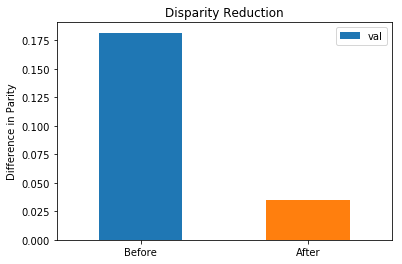

In [328]:
df_pl = pd.DataFrame({'':['Before', 'After'], 'val':[abs(g0_1-g0_0), abs(g1-g0)]})
ax = df_pl.plot.bar(x='', y='val', rot=0)

plt.ylabel('Difference in Parity')
plt.title('Disparity Reduction')
plt.legend()
plt.show()

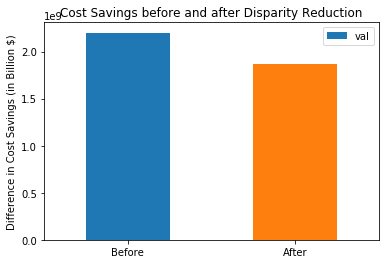

In [337]:
df_pl = pd.DataFrame({'':['Before', 'After'], 'val':[pre_sav, post_sav]})
ax = df_pl.plot.bar(x='', y='val', rot=0)

plt.ylabel('Difference in Cost Savings (in Billion $)')
plt.title('Cost Savings before and after Disparity Reduction')
plt.legend()
plt.show()